# AI vs Human art classification
This project is done as part of the Context Aware Security Analytics In Computer Vision 2023/2024 course

Supervised by **Carmen Bisogni**

By **Zakarya Boudraf**, **Mohammed Aziz Khitmi** and **Melissa Ould Braham**

## Now we fit the model on all styles at once

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### listing the training then the testing directories 

In [4]:
top_dir = '/kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset'

# Define the training paths
train_dir = os.path.join(top_dir, 'train')

# List all directories in the train directory
all_directories = os.listdir(train_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
train_human = []
train_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        train_human.append(os.path.join(train_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        train_ai.append(os.path.join(train_dir, directory))

# Print the lists of directories
print("Train directories containing human-drawn images:")
for i, directory in enumerate(train_human):
    print(f"{i}. {directory}")

print("\nTrain directories containing AI-generated images:")
for i, directory in enumerate(train_ai):
    print(f"{i}. {directory}")

Train directories containing human-drawn images:
0. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/impressionism
1. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/renaissance
2. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/surrealism
3. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/art_nouveau
4. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/baroque
5. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/expressionism
6. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/romanticism
7. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/ukiyo_e
8. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/post_impressionism
9. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/realism

Train directories containing AI-generated images:
0. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/AI_SD_impressionism
1. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/AI_LD_post_impressionism
2. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/tr

In [5]:
# Define the test paths
test_dir = os.path.join(top_dir, 'test')

# List all directories in the test directory
all_directories = os.listdir(test_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
test_human = []
test_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        test_human.append(os.path.join(test_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        test_ai.append(os.path.join(test_dir, directory))

# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/impressionism
1. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/renaissance
2. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/surrealism
3. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/art_nouveau
4. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/baroque
5. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/expressionism
6. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/romanticism
7. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/ukiyo_e
8. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/post_impressionism
9. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/realism

Test directories containing AI-generated images:
0. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/AI_SD_impressionism
1. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/AI_LD_post_impressionism
2. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/AI_LD_art_n

# Ranking the styles from easiest to hardest to classify 
1. Realism
1. Renaissance
1. Ukiyo-e
1. Baroque
1. Post-Impressionism
1. Impressionism
1. Romanticism
1. Expressionism
1. Surrealism
1. Art Nouveau

# Model for Classifying AI-Generated images on all styles
## First we list the training data

In [6]:
# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/impressionism
1. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/renaissance
2. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/surrealism
3. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/art_nouveau
4. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/baroque
5. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/expressionism
6. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/romanticism
7. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/ukiyo_e
8. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/post_impressionism
9. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/realism

Test directories containing AI-generated images:
0. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/AI_SD_impressionism
1. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/AI_LD_post_impressionism
2. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/AI_LD_art_n

# Labeling the training data

In [7]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for train_data
train_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under train_human as "human"
for directory in train_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

# Label files under train_ai as "AI"
for directory in train_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with train_data
train_data = pd.concat([train_data, data], ignore_index=True)

In [8]:
train_data

,filepath,label
0,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
1,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
2,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
3,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
4,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
...,...,...
155010,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
155011,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
155012,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
155013,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI


### We split the training data into training and validation subsets (80/20)

In [9]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(train_data, test_size=0.2)

In [10]:
train_data

,filepath,label
63810,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
116956,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
12098,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
93915,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
88537,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
...,...,...
37597,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
27664,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
152583,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
33310,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human


In [11]:
validation_data

,filepath,label
30799,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
96915,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
34210,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
21300,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
29256,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
...,...,...
65149,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
9704,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
113196,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
92603,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI


In [12]:
# Count the number of files under each label
file_counts = train_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       84054
human    39958
Name: count, dtype: int64


In [13]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for test_data
test_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under test_human as "human"
for directory in test_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

# Label files under test_ai as "AI"
for directory in test_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with test_data
test_data = pd.concat([test_data, data], ignore_index=True)

In [14]:
test_data

,filepath,label
0,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
1,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
2,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
3,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
4,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
...,...,...
29995,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
29996,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
29997,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
29998,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI


In [15]:
# Count the number of files under each label
file_counts = test_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       20000
human    10000
Name: count, dtype: int64


### Creating the Training and Validation sets

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory

training_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                       # rotation_range=7, # it will apply rotations to the image
                                       # horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )
train_dataset = training_generator.flow_from_dataframe(
    dataframe=train_data,
    x_col='filepath',  # Column containing file paths
    y_col='label',     # Column containing labels
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

2024-06-03 20:22:14.841654: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 20:22:14.841795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 20:22:15.005079: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 124012 validated image filenames belonging to 2 classes.


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory

validation_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                       # rotation_range=7, # it will apply rotations to the image
                                       # horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )
validation_dataset = validation_generator.flow_from_dataframe(
    dataframe=validation_data,
    x_col='filepath',  # Column containing file paths
    y_col='label',     # Column containing labels
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',  
    shuffle=True
)

Found 31003 validated image filenames belonging to 2 classes.


In [18]:
train_dataset.class_indices

{'AI': 0, 'human': 1}

### Creating the Test set

In [19]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_dataframe(  dataframe=test_data,
                                                    x_col='filepath',  # Column containing file paths
                                                    y_col='label',     # Column containing labels
                                                    target_size = (32, 32),
                                                    batch_size = 1,    # 1 image at a time to evaluate the NN
                                                    class_mode = 'categorical',
                                                    shuffle = False)   # to associate the prediction with expected output

test_dataset.class_indices

Found 30000 validated image filenames belonging to 2 classes.


{'AI': 0, 'human': 1}

### Building the neural network

In [20]:
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.metrics import Precision, Recall

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 3, input_shape = (32,32,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
# MLP
# adding the first hidden layer 
model.add(Dense(units = 32, activation = 'relu', input_dim = 64))

# adding the second hidden layer 
model.add(Dense(units = 16, activation = 'relu'))

# adding the output layer 
model.add(Dense(units = 2, activation = 'softmax')) 

model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )  

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,042 (441.57 KB)

 Trainable params: 113,042 (441.57 KB)

 Non-trainable params: 0 (0.00 B)

### We fit the model to the data (we implement checkpointing to save the weights of the maximum val_acc model)

In [19]:
os.makedirs('../working/models')

In [20]:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = '../working/models/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model is saved at the end of every epoch, if it's the best seen so far.

In [21]:
import time

# Initial epoch count
epochs = 30

# Initialize total training time
total_training_time = 0


# Record start time
start_time = time.time()

# Fit the model for the specified number of epochs
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset, callbacks=[model_checkpoint_callback])

# Calculate training time for the current batch of epochs
training_time = time.time() - start_time

# Print total training time
print("Total training time so far: {:.2f} seconds".format(training_time))


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1938/1938 ━━━━━━━━━━━━━━━━━━━━ 945s 485ms/step - accuracy: 0.8205 - loss: 0.3879 - val_accuracy: 0.9012 - val_loss: 0.2434
Epoch 2/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 526s 270ms/step - accuracy: 0.9069 - loss: 0.2286 - val_accuracy: 0.9195 - val_loss: 0.2019
Epoch 3/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 536s 276ms/step - accuracy: 0.9231 - loss: 0.1947 - val_accuracy: 0.9290 - val_loss: 0.1791
Epoch 4/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 521s 268ms/step - accuracy: 0.9305 - loss: 0.1735 - val_accuracy: 0.9346 - val_loss: 0.1703
Epoch 5/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 529s 272ms/step - accuracy: 0.9360 - loss: 0.1606 - val_accuracy: 0.9309 - val_loss: 0.1738
Epoch 6/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 527s 271ms/step - accuracy: 0.9421 - loss: 0.1448 - val_accuracy: 0.9352 - val_loss: 0.1657
Epoch 7/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 534s 275ms/step - accuracy: 0.9457 - loss: 0.1357 - val_accuracy: 0.9278 - val_loss: 0.1800
Epoch 8/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 523s 269ms/step - accuracy: 0.9

### Evaluating the network

In [22]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

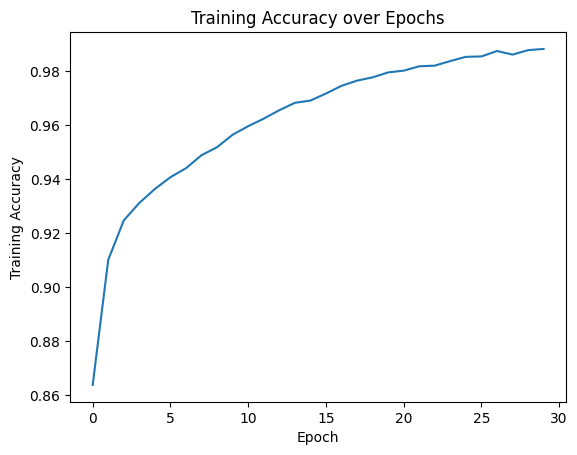

In [23]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()

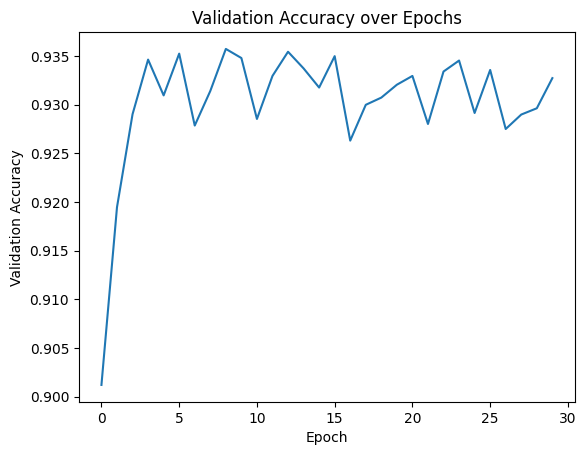

In [24]:
from matplotlib import pyplot as plt

plt.plot(history.history['val_accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

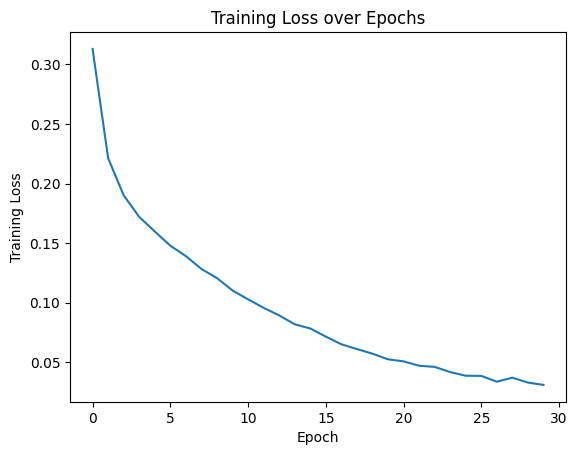

In [25]:
plt.plot(history.history['loss']);
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

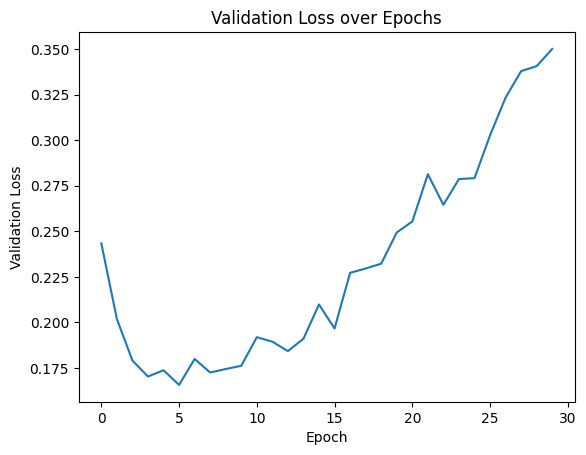

In [26]:
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

## Reviewing the results
We notice from the graphs of our first approach that our models need more epochs to stablize.

In [27]:
# The model weights (that are considered the best) can be loaded as -
model.load_weights(checkpoint_filepath)

In [29]:
predictions = model.predict(test_dataset)
predictions

30000/30000 ━━━━━━━━━━━━━━━━━━━━ 300s 10ms/step


array([[4.17999370e-04, 9.99581993e-01],
       [1.18799366e-01, 8.81200612e-01],
       [2.41851827e-09, 1.00000000e+00],
       ...,
       [9.99997497e-01, 2.53297117e-06],
       [9.96300817e-01, 3.69920582e-03],
       [9.72130656e-01, 2.78692935e-02]], dtype=float32)

In [30]:
test_dataset.class_indices

{'AI': 0, 'human': 1}

In [31]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([1, 1, 1, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     20000
           1       0.90      0.90      0.90     10000

    accuracy                           0.94     30000
   macro avg       0.93      0.93      0.93     30000
weighted avg       0.94      0.94      0.94     30000



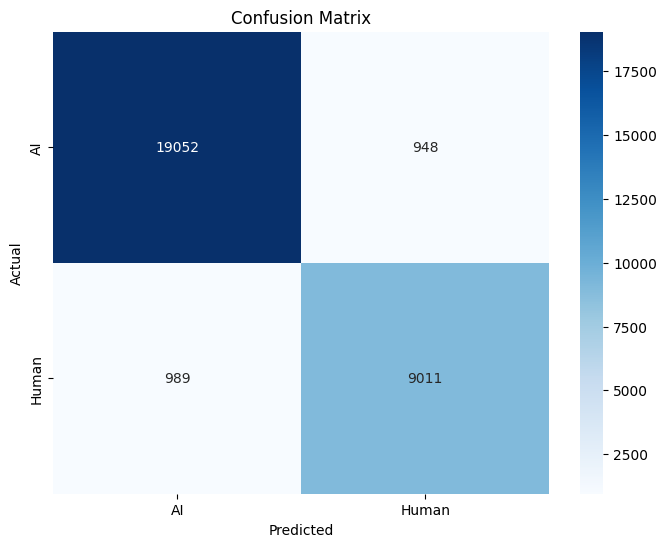

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix and classification report
cm = confusion_matrix(test_dataset.classes, predictions)
report = classification_report(test_dataset.classes, predictions)

# Define custom labels for the axes
labels = ['AI', 'Human']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report
print(report)

# Show the plot
plt.show()

### Suggested solutions
Training for too long can cause overfitting, while training for too short a time leads to underfitting. 

We suggest implementing Early Stopping as a solution, Early stopping helps prevent this by allowing you to train for a flexible amount of time based on when the model's performance on a separate validation dataset plateaus.


In [21]:
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.metrics import Precision, Recall

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model_2 = Sequential()
model_2.add(Conv2D(filters = 512, kernel_size = 3, input_shape = (32,32,3), activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(filters = 128, kernel_size = 3, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(filters = 32, kernel_size = 3, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Flatten())
# MLP
# adding the first hidden layer 
model_2.add(Dense(units = 32, activation = 'relu', input_dim = 64))

# adding the second hidden layer 
model_2.add(Dense(units = 16, activation = 'relu'))

# adding the output layer 
model_2.add(Dense(units = 2, activation = 'softmax')) 

model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )  

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 512)    │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 645,874 (2.46 MB)

 Trainable params: 645,874 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = '../working/models/checkpoint.model_2.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model is saved at the end of every epoch, if it's the best seen so far.

In [ ]:
import time

# Initial epoch count
epochs = 30

# Initialize total training time
total_training_time = 0


# Record start time
start_time = time.time()

# Fit the model for the specified number of epochs
history = model_2.fit(train_dataset, epochs=epochs, validation_data=validation_dataset, callbacks=[model_checkpoint_callback])

# Calculate training time for the current batch of epochs
training_time = time.time() - start_time

# Print total training time
print("Total training time so far: {:.2f} seconds".format(training_time))


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1893s 973ms/step - accuracy: 0.8053 - loss: 0.4128 - val_accuracy: 0.8791 - val_loss: 0.2835
Epoch 2/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1865s 961ms/step - accuracy: 0.8928 - loss: 0.2565 - val_accuracy: 0.9142 - val_loss: 0.2136
Epoch 3/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1927s 993ms/step - accuracy: 0.9143 - loss: 0.2117 - val_accuracy: 0.9125 - val_loss: 0.2230
Epoch 4/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1872s 957ms/step - accuracy: 0.9265 - loss: 0.1833 - val_accuracy: 0.9248 - val_loss: 0.1932
Epoch 5/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1917s 975ms/step - accuracy: 0.9329 - loss: 0.1692 - val_accuracy: 0.9295 - val_loss: 0.1759
Epoch 6/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1898s 978ms/step - accuracy: 0.9381 - loss: 0.1539 - val_accuracy: 0.9334 - val_loss: 0.1703
Epoch 7/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1915s 963ms/step - accuracy: 0.9442 - loss: 0.1412 - val_accuracy: 0.9339 - val_loss: 0.1712
Epoch 8/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1887s 967ms/step - accur

In [19]:
history.history.keys()

NameError: name 'history' is not defined

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['val_accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

In [ ]:
plt.plot(history.history['loss']);
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [ ]:
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

## Reviewing the results
We notice from the graphs of our first approach that our models need more epochs to stablize.

In [22]:
# The model weights (that are considered the best) can be loaded as
model_2.load_weights("/kaggle/working/models/checkpoint.model_2.keras")

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [23]:
predictions = model_2.predict(test_dataset)
predictions

    1/30000 ━━━━━━━━━━━━━━━━━━━━ 1:57:49 236ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30000/30000 ━━━━━━━━━━━━━━━━━━━━ 310s 10ms/step


array([[3.3433881e-04, 9.9966562e-01],
       [1.4557776e-01, 8.5442221e-01],
       [7.3669941e-07, 9.9999928e-01],
       ...,
       [1.0000000e+00, 5.8309690e-12],
       [9.9770039e-01, 2.2996310e-03],
       [9.9873728e-01, 1.2627925e-03]], dtype=float32)

In [24]:
test_dataset.class_indices

{'AI': 0, 'human': 1}

In [25]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([1, 1, 1, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     20000
           1       0.91      0.91      0.91     10000

    accuracy                           0.94     30000
   macro avg       0.93      0.93      0.93     30000
weighted avg       0.94      0.94      0.94     30000



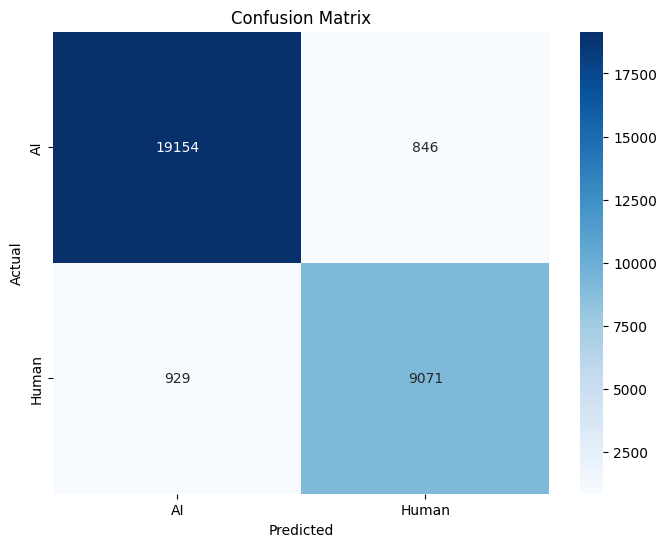

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix and classification report
cm = confusion_matrix(test_dataset.classes, predictions)
report = classification_report(test_dataset.classes, predictions)

# Define custom labels for the axes
labels = ['AI', 'Human']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report
print(report)

# Show the plot
plt.show()

## Testing the same model(s) on the second dataset

In [29]:
# Define the test paths
test_2_dir = "/kaggle/input/ai-and-human-art-classification/ai_art_classification/train"

# List all directories in the test directory
all_directories = os.listdir(test_2_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
test_human = []
test_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        test_human.append(os.path.join(test_2_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        test_ai.append(os.path.join(test_2_dir, directory))

# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. /kaggle/input/ai-and-human-art-classification/ai_art_classification/train/NON_AI_GENERATED

Test directories containing AI-generated images:
0. /kaggle/input/ai-and-human-art-classification/ai_art_classification/train/AI_GENERATED


In [44]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for test_data
test_data_2 = pd.DataFrame(columns=['filepath', 'label'])

# Label files under test_human as "human"
for directory in test_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

# Label files under test_ai as "AI"
for directory in test_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with test_data
test_data_2 = pd.concat([test_data_2, data], ignore_index=True)

In [45]:
test_data_2

,filepath,label
0,/kaggle/input/ai-and-human-art-classification/...,human
1,/kaggle/input/ai-and-human-art-classification/...,human
2,/kaggle/input/ai-and-human-art-classification/...,human
3,/kaggle/input/ai-and-human-art-classification/...,human
4,/kaggle/input/ai-and-human-art-classification/...,human
...,...,...
18613,/kaggle/input/ai-and-human-art-classification/...,AI
18614,/kaggle/input/ai-and-human-art-classification/...,AI
18615,/kaggle/input/ai-and-human-art-classification/...,AI
18616,/kaggle/input/ai-and-human-art-classification/...,AI


In [32]:
test_generator_2 = ImageDataGenerator(rescale=1./255)
test_dataset_2 = test_generator_2.flow_from_dataframe(  dataframe=test_data,
                                                    x_col='filepath',  # Column containing file paths
                                                    y_col='label',     # Column containing labels
                                                    target_size = (32, 32),
                                                    batch_size = 1,    # 1 image at a time to evaluate the NN
                                                    class_mode = 'categorical',
                                                    shuffle = False)   # to associate the prediction with expected output

test_dataset_2.class_indices

Found 18618 validated image filenames belonging to 2 classes.


{'AI': 0, 'human': 1}

In [33]:
model.load_weights("/kaggle/working/models/checkpoint.model.keras")
model_2.load_weights("/kaggle/working/models/checkpoint.model_2.keras")
predictions = model.predict(test_dataset_2)
predictions_2 = model_2.predict(test_dataset_2)

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


   23/18618 ━━━━━━━━━━━━━━━━━━━━ 2:15 7ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18618/18618 ━━━━━━━━━━━━━━━━━━━━ 138s 7ms/step
18618/18618 ━━━━━━━━━━━━━━━━━━━━ 110s 6ms/step


In [38]:
predictions

array([1, 1, 1, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.84      0.54      0.66     10330
           1       0.60      0.87      0.71      8288

    accuracy                           0.69     18618
   macro avg       0.72      0.70      0.68     18618
weighted avg       0.73      0.69      0.68     18618



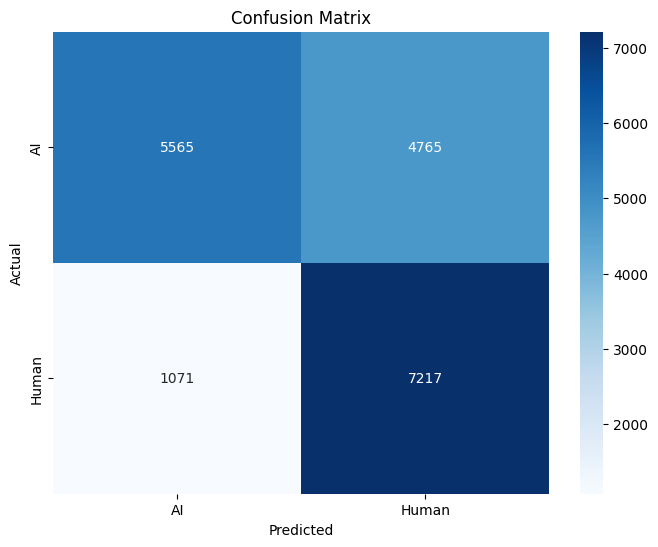

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix and classification report
cm = confusion_matrix(test_dataset_2.classes, predictions)
report = classification_report(test_dataset_2.classes, predictions)

# Define custom labels for the axes
labels = ['AI', 'Human']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report
print(report)

# Show the plot
plt.show()

In [39]:
predictions_2

array([1, 1, 1, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.82      0.50      0.62     10330
           1       0.58      0.87      0.70      8288

    accuracy                           0.66     18618
   macro avg       0.70      0.68      0.66     18618
weighted avg       0.72      0.66      0.66     18618



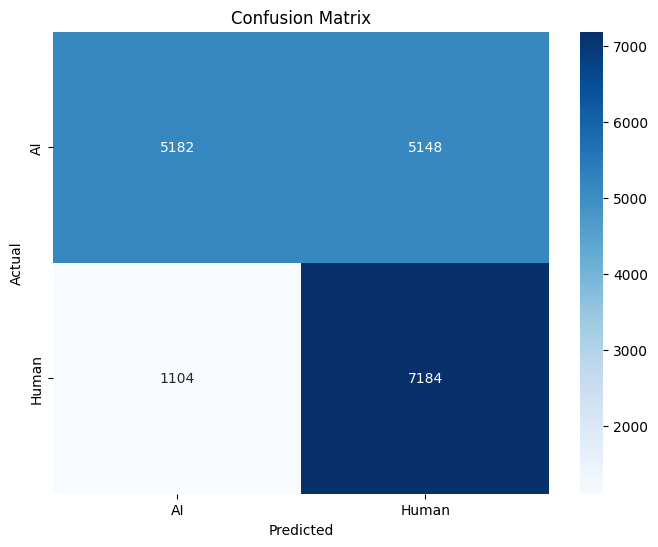

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix and classification report
cm = confusion_matrix(test_dataset_2.classes, predictions_2)
report = classification_report(test_dataset_2.classes, predictions_2)

# Define custom labels for the axes
labels = ['AI', 'Human']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report
print(report)

# Show the plot
plt.show()